In [7]:
import os
import skimage as sk
from skimage.filters import gaussian
from skimage.util import random_noise
from skimage.io import imread
from skimage.transform import resize
from skimage.io import imshow

In [12]:
classes = []        # List of all classes
img_data = []       # Non-flattened images
img_flattened = []  # Flattened images (needed for noise generation)
img_target = []     # Class belonging to each image

num_img = 100
dir_init = './caltech-101/'

n = 0
# Iterate through all folders in caltech101 file
for category in os.listdir(dir_init):
    
    if(category == '.DS_Store'):
        continue
        
    dir_img = os.path.join(dir_init, category)
    
    total_imgs = os.listdir(dir_img)
    if len(total_imgs) >= 100:       # If there are at least 100 images in the class
        
        classes.append(category)
        n_i = 0
        
        for img in os.listdir(dir_img):
            if(img == '.DS_Store'):
                continue
                
            img = imread(os.path.join(dir_img, img))   # Read the image as a vector 
            img_resized = resize(img, (150, 150, 3))
            img_data.append(img_resized)
            img_flattened.append(img_resized.flatten())
            img_target.append(classes.index(category))
            
            n_i += 1
            if (n_i == num_img):
                break

In [45]:
# Gaussian image generation

gaussian_images = {}

for std in range(1,11):
    temp = []
    for img in img_data:
        temp.append(random_noise(img,var= (std/100),mode='gaussian'))
        
    gaussian_images[std/100] = temp

In [46]:
# Poisson image generation

poisson_images = {}

for std in range(2,21,2):
    temp = []
    for img in img_data:
        temp.append(random_noise(img,rng= std,mode='poisson'))
        
    poisson_images[std] = temp

KeyboardInterrupt: 

In [53]:
sp_images = {}

for variance in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]:

    temp = []

    for img in img_data:
        temp.append(random_noise(img, amount = variance, mode='s&p'))
        
    sp_images[variance] = temp

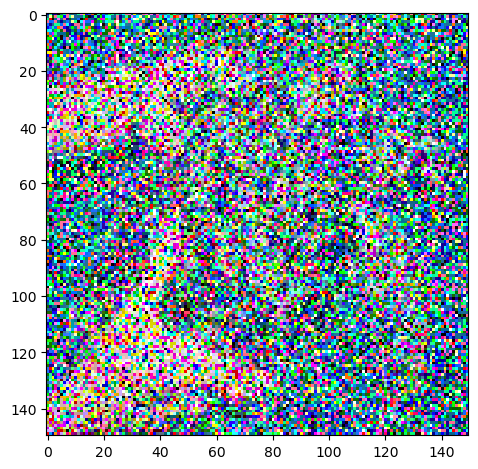

In [54]:
imshow(sp_images[0.5][0])

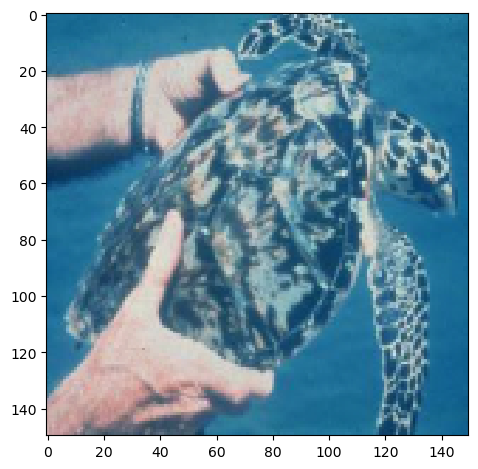

In [43]:
imshow(poisson_images[20][0])

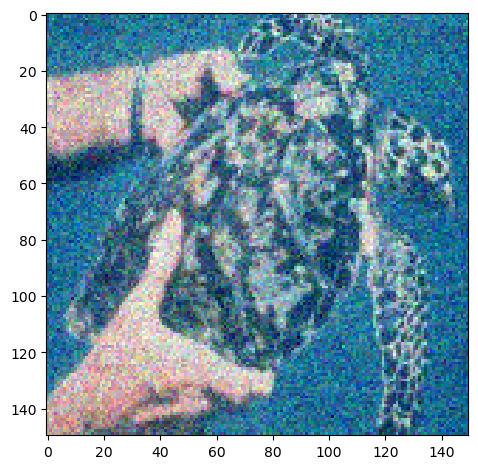

In [47]:
imshow(gaussian_images[0.01][0])

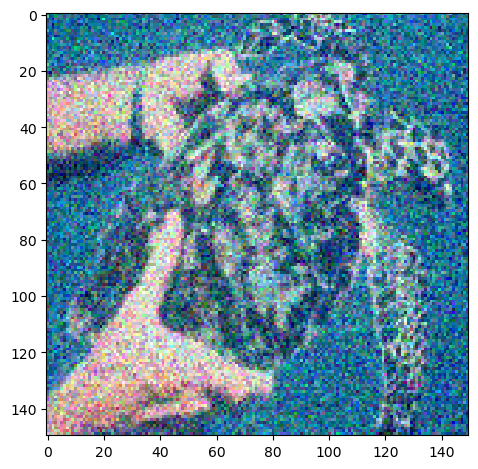

In [48]:
imshow(gaussian_images[0.02][0])

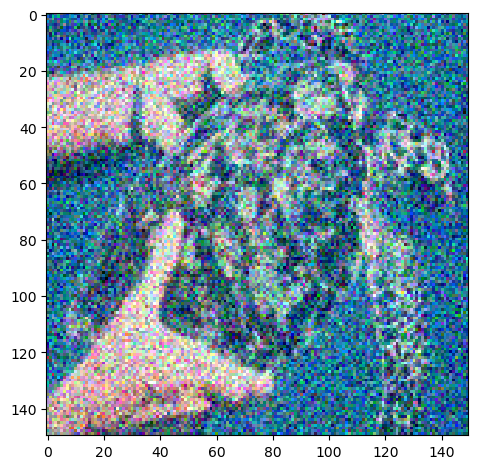

In [49]:
imshow(gaussian_images[0.03][0])

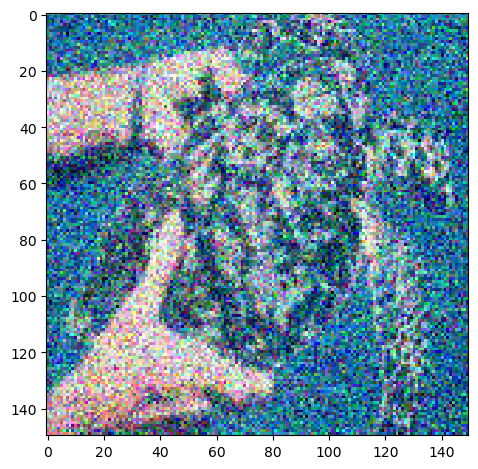

In [50]:
imshow(gaussian_images[0.04][0])

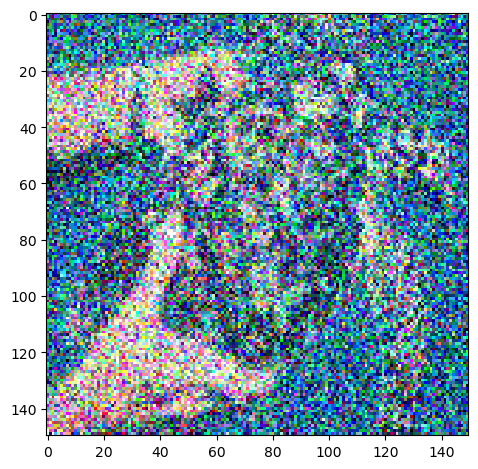

In [52]:
imshow(gaussian_images[0.1][0])